In [1]:
from ml.features.preprocessing import get_data
from ml.ml_functions.registry.model_registry import log_sklearn_model_to_mlflow
from ml.ml_functions.serve.mlflow_model_serve import mlflow_model_prediction

In [2]:
import os
os.path.join(os.path.abspath("metadata"), "acutal_model.txt")

'/home/erik/DataspellProjects/stock-prediction/ml/ml_functions/metadata/acutal_model.txt'

## Load Dataset with new Features

In [9]:
stock_data, last_day_df = get_data(save_data=False, new_model=None)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## Train your Sklearn-Model

Modellname: ExtraTreesClassifier
Genauigkeit: 0.9136752136752136


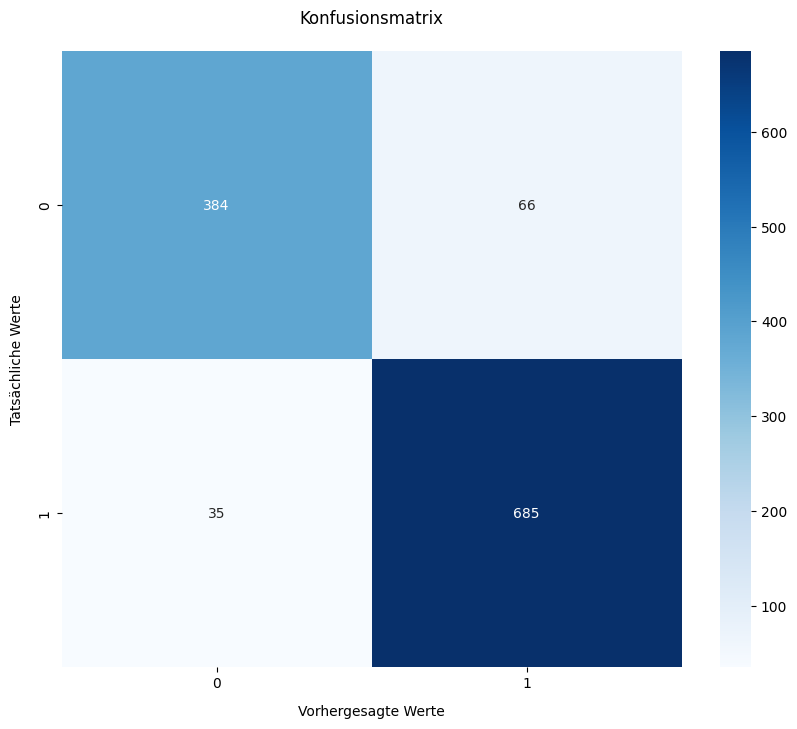

<Figure size 640x480 with 0 Axes>

In [6]:
from ml.ml_functions.training.train_extra_tree import train_extra_tree

model, accuracy = train_extra_tree(stock_data)

## Model Registry 

 ml/models mlflow server --host 0.0.0.0 --port 5000

### mlflow server --host 0.0.0.0 --port 5000


In [5]:
actual_model_path = log_sklearn_model_to_mlflow(model=model, accuracy=accuracy)

2023/12/16 11:29:42 INFO mlflow.tracking.fluent: Experiment with name 'sp500_prediction' does not exist. Creating a new experiment.
2023/12/16 11:29:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: best_ExtraTreesClassifier_model, version 1


First model registered as best model!
Model path saved!


## Test if model is working

In [10]:
model.predict(last_day_df)

array([0])

## Save current feature data for prediction

In [3]:
stock_data, last_day_df = get_data(save_data=True, new_model=(model.__class__.__name__, accuracy))

NameError: name 'model' is not defined

### Predict the new Data with Mlflow-Model

In [2]:
#result = mlflow_model_prediction(model=actual_model_path)
result = mlflow_model_prediction()

/home/erik/DataspellProjects/stock-prediction/ml/ml_functions


/home/erik/anaconda3/envs/Stock-Prediction/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


Complete. Return to the InfluxDB UI.
Vorhersage wurde erstellt
